In [15]:
import pandas as pd
import lasio
import matplotlib.pyplot as plt

In [16]:
# las = lasio.read(path)
# df = las.df()
# df.head()

In [17]:
df = pd.read_csv('data/archive/25_10-9.csv')
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,25/10-9,1333.0888,452397.125,6552707.5,-1307.861816,HORDALAND GP.,Skade Fm.,12.803179,NaN,1.054318,...,10.321353,NaN,-4.696822,-0.053372,NaN,NaN,10.183098,NaN,65000,1.0
1,25/10-9,1333.2408,452397.125,6552707.5,-1308.013550,HORDALAND GP.,Skade Fm.,12.980501,NaN,1.064818,...,10.909264,NaN,-4.519499,-0.049997,NaN,NaN,9.987290,NaN,65000,1.0
2,25/10-9,1333.3928,452397.125,6552707.5,-1308.165405,HORDALAND GP.,Skade Fm.,13.105945,NaN,1.075315,...,11.486927,NaN,-4.394056,-0.047079,NaN,NaN,9.783754,NaN,65000,1.0
3,25/10-9,1333.5448,452397.125,6552707.5,-1308.317139,HORDALAND GP.,Skade Fm.,13.194360,NaN,1.078497,...,13.383134,NaN,-4.305640,-0.045022,NaN,NaN,9.579964,NaN,65000,1.0
4,25/10-9,1333.6968,452397.125,6552707.5,-1308.468994,HORDALAND GP.,Skade Fm.,13.078276,NaN,1.044631,...,15.475309,NaN,-4.421725,-0.045917,NaN,NaN,9.376296,NaN,65000,1.0


In [18]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

<Axes: xlabel='GR'>

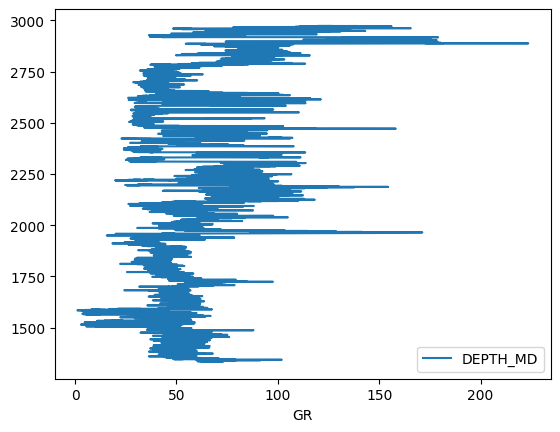

In [19]:
df.plot('GR', 'DEPTH_MD')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

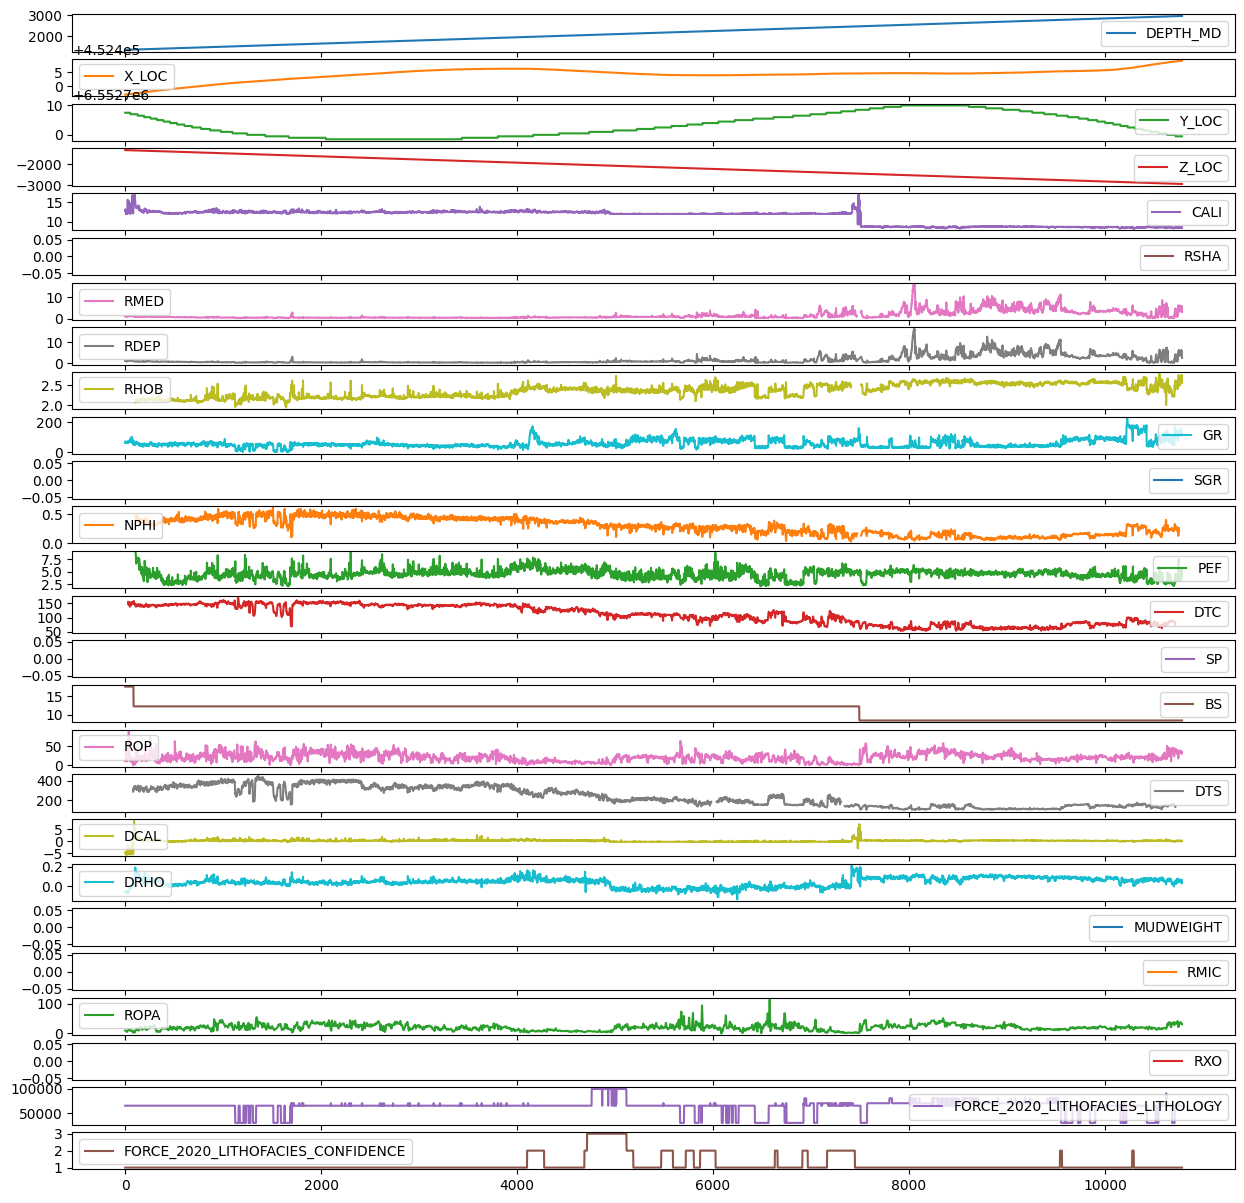

In [20]:
df.plot(subplots=True, figsize=(15, 15))

C:\Users\tatya\AppData\Local\Temp\ipykernel_4592\3733341207.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)


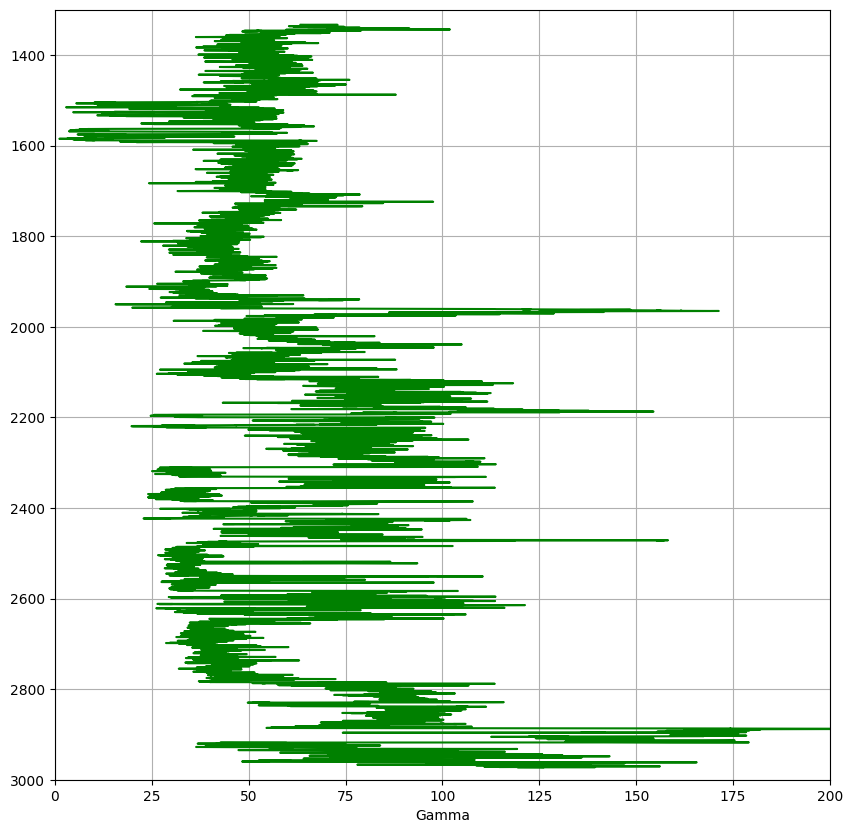

In [21]:
fig = plt.subplots(figsize=(10, 10))
ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
ax1.plot("GR", "DEPTH_MD", data=df, color='green')
ax1.set_xlabel('Gamma')
ax1.set_xlim(0, 200)
ax1.set_ylim(3000, 1300)
ax1.grid()

C:\Users\tatya\AppData\Local\Temp\ipykernel_4592\546415714.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=1)


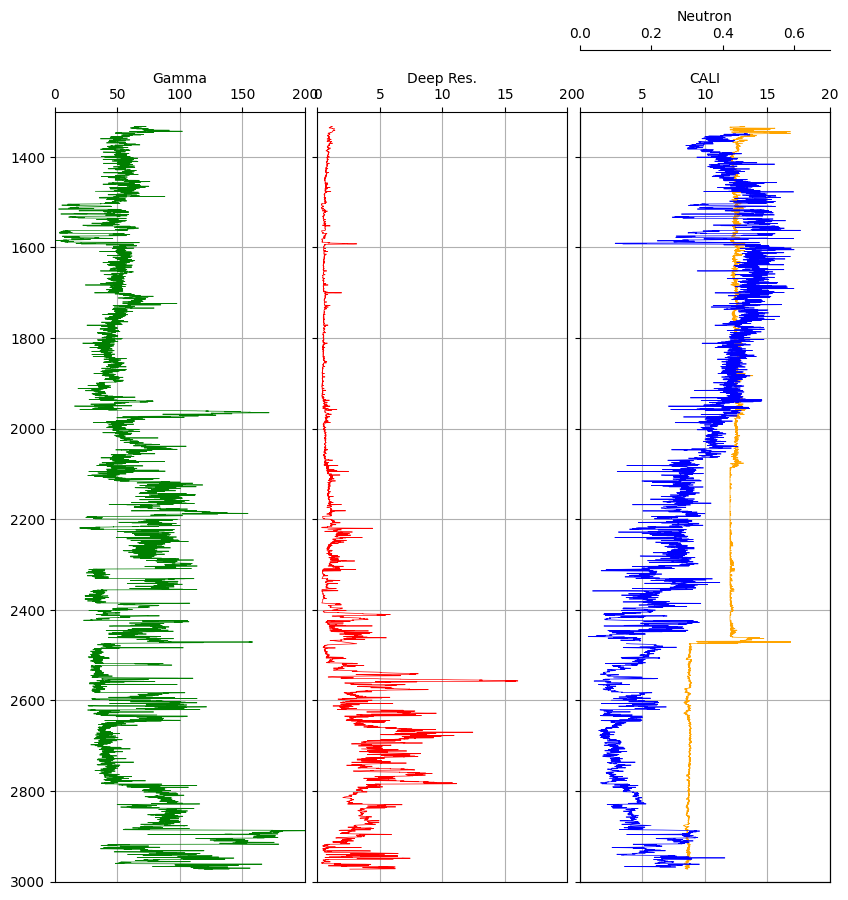

In [47]:
curve_names = ['Gamma', 'Deep Res.', 'CALI', 'Neutron']
fig, axes = plt.subplots(figsize=(10, 10))

ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 3), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)
ax4 = ax3.twiny()

ax1.plot("GR", "DEPTH_MD", data=df, color='green', lw=0.5)
ax1.set_xlim(0, 200)

ax2.plot("RDEP", "DEPTH_MD", data=df, color='red', lw=0.5)
ax2.set_xlim(0, 20)

ax3.plot("CALI", "DEPTH_MD", data=df, color='orange', lw=0.5)
ax3.set_xlim(0, 20)

ax4.plot("NPHI", "DEPTH_MD", data=df, color='blue', lw=0.5)
ax4.set_xlim(0, 0.7)

for i, ax in enumerate(fig.axes):
    ax.set_ylim(3000, 1300)

    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])

    if i==3:
        ax.spines['top'].set_position(('axes', 1.08))
    else:
        ax.grid()

for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible=False)

fig.subplots_adjust(wspace = 0.05)